In [64]:
import random
import os
import urllib3
import pandas as pd
from pandas import Series
import geopandas as gpd
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imageio
from matplotlib.lines import Line2D
import geoplot as gplt

COMMON_DIR = os.path.join(os.pardir, 'common')
sys.path.insert(1, COMMON_DIR)

import data_retreiver
import time_adjusted_price as money
print(dir(data_retreiver))
from datetime import date

ModuleNotFoundError: No module named 'geoplot'

In [3]:
#data_retreiver.download_family_datasets()
#data_retreiver.download_geo_data()
print()

<AxesSubplot:>

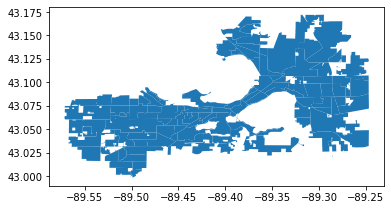

In [28]:
fam_core = data_retreiver.load_csv_datasets("single_family_core")[0]
assessment_areas = data_retreiver.load_geo_datasets("single_family_areas_shapes")[0]
assessment_areas.plot()


In [29]:
assessment_areas

,OBJECTID,Area_Numbe,ORIG_FID,SHAPESTAre,SHAPESTLen,geometry
0,1,102,2.0,2.930758e+04,757.599384,"POLYGON ((-89.28556 43.02021, -89.28612 43.020..."
1,2,102,2.0,2.675664e+04,712.621722,"POLYGON ((-89.28559 43.02112, -89.28614 43.021..."
2,4,122,2.0,7.214181e+06,13587.720415,"POLYGON ((-89.27876 43.03727, -89.27683 43.037..."
3,5,31,4.0,1.167597e+07,16518.832670,"POLYGON ((-89.30903 43.05497, -89.30905 43.055..."
4,6,33,5.0,2.079719e+07,22832.099748,"POLYGON ((-89.31112 43.07350, -89.31113 43.073..."
...,...,...,...,...,...,...
134,556,102,2.0,3.233967e+07,38318.458951,"POLYGON ((-89.28347 43.04631, -89.28146 43.045..."
135,557,121,2.0,3.101062e+06,7728.759792,"POLYGON ((-89.28608 43.03148, -89.28608 43.031..."
136,558,120,2.0,1.686569e+06,5617.094536,"POLYGON ((-89.28909 43.03144, -89.29048 43.035..."
137,561,123,92.0,8.655775e+06,16266.033335,"POLYGON ((-89.38112 43.05242, -89.38123 43.052..."


In [30]:
fam_core

,XRefParcel,Address,PropertyClass,PropertyUse,AssessmentArea,MoreThanOneBuild,HomeStyle,YearBuilt,Bedrooms,FullBaths,...,lat,lon,property_kind,industrial_sites_near,commercial_sites_near,vacant_sites_near,Total_Assessment,Recent_Sales_Price_Time_Ajusted,Recent_Sales_Price_Inflated,Recent_Sales_Price_Growth
Parcel,,,,,,,,,,,,,,,,,,,,,
71002302108,71002302108,102 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,43.099129,-89.276046,single_family_home,0,7,257,28200.0,283463.10,268163.10,NaN
71002302116,71002302116,104 North Star Dr,Residential,Single family,115,NaN,Townhouse Duplex,2019,3,2,...,43.099014,-89.276044,single_family_home,0,7,257,15200.0,270198.00,254898.00,NaN
71002302124,71002302124,106 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,43.098933,-89.276046,single_family_home,0,7,257,15200.0,252042.00,252042.00,NaN
71002302132,71002302132,108 North Star Dr,Residential,Single family,115,NaN,Townhouse,2019,3,2,...,43.098844,-89.276054,single_family_home,0,7,258,17500.0,273258.00,257958.00,NaN
71002303015,71002303015,111 Milky Way,Residential,Single family,99,NaN,Modern two story,2016,3,2,...,43.098459,-89.279057,single_family_home,0,7,253,230600.0,262650.00,247350.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71001416124,71001416124,7121 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,43.099518,-89.250960,single_family_home,0,0,30,315300.0,350989.36,327869.36,NaN
71001416132,71001416132,7127 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,43.099613,-89.250718,single_family_home,0,0,30,314400.0,350065.84,326945.84,NaN
71001416140,71001416140,7133 Field Flower Way,Residential,Single family,103,NaN,Ranch,2018,3,2,...,43.099732,-89.250479,single_family_home,0,0,30,311100.0,346639.04,323519.04,NaN


In [41]:
all_areas = set(assessment_areas['Area_Numbe'].values)
all_areas

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125}

In [59]:
#assessment_areas.plot(column='Area_Numbe')
#assessment_areas = assessment_areas.set_index("Area_Numbe")
#assessment_areas['Area_Number']
#assessment_areas.plot(column="")

def stddev_time_adjusted_sales_prices(data):
    sales_prices = data["Recent_Sales_Price_Inflated"].dropna().values
    sales_prices = [p for p in sales_prices if p > 0]
    return np.std(sales_prices)

def avg_time_adjusted_sales_prices(data):
    sales_prices = data["Recent_Sales_Price_Inflated"].dropna().values
    sales_prices = [p for p in sales_prices if p > 0]
    return np.mean(sales_prices)

def stddev_growth_rate(data):
    growth_rates = data["Recent_Sales_Price_Growth"].dropna().values
    return np.std(growth_rates)

def avg_growth_rate(data):
    growth_rates = data["Recent_Sales_Price_Growth"].dropna().values
    return np.mean(growth_rates)

def num_homes(data):
    return len(data)

def homes_in_area(data, area):
    return data[data["AssessmentArea"] == area]

def calculate_area_summaries(all_areas, data, summary_fn):
    result = {} #Dictionary area --> summary statistic calualted with summary_fn
    for area in all_areas:
        area_homes = homes_in_area(data, area)
        if(len(area_homes) < 1):
            result[area] = np.nan
        summary = summary_fn(area_homes)
        result[area] = summary
    return result

def add_col_from_area_dict(geo_df, col_name, dict):
    geo_df[col_name] = geo_df["Area_Numbe"].apply(lambda area: dict[area])
    return geo_df

area_num_homes = calculate_area_summaries(all_areas, fam_core, num_homes)
area_stddev_growth_rate = calculate_area_summaries(all_areas, fam_core, stddev_growth_rate)
area_avg_growth_rate = calculate_area_summaries(all_areas, fam_core, avg_growth_rate)
area_stddev_sales_prices = calculate_area_summaries(all_areas, fam_core, stddev_time_adjusted_sales_prices)
area_avg_sales_prices = calculate_area_summaries(all_areas, fam_core, avg_time_adjusted_sales_prices)


assmt_areas = add_col_from_area_dict(assessment_areas, "Num_Homes", area_num_homes)
assmt_areas = add_col_from_area_dict(assmt_areas, "Growth_Std", area_stddev_growth_rate)
assmt_areas = add_col_from_area_dict(assmt_areas, "Growth_Mean", area_avg_growth_rate)
assmt_areas = add_col_from_area_dict(assmt_areas, "Sales_Price_Std", area_stddev_sales_prices)
assmt_areas = add_col_from_area_dict(assmt_areas, "Sales_Price_Mean", area_avg_sales_prices)
assmt_areas


,OBJECTID,Area_Numbe,ORIG_FID,SHAPESTAre,SHAPESTLen,geometry,Num_Homes,Growth_Std,Growth_Mean,Sales_Price_Std,Sales_Price_Mean
0,1,102,2.0,2.930758e+04,757.599384,"POLYGON ((-89.28556 43.02021, -89.28612 43.020...",323,8312.187839,2748.357472,48550.987994,251072.092312
1,2,102,2.0,2.675664e+04,712.621722,"POLYGON ((-89.28559 43.02112, -89.28614 43.021...",323,8312.187839,2748.357472,48550.987994,251072.092312
2,4,122,2.0,7.214181e+06,13587.720415,"POLYGON ((-89.27876 43.03727, -89.27683 43.037...",304,NaN,NaN,57567.936455,328108.081349
3,5,31,4.0,1.167597e+07,16518.832670,"POLYGON ((-89.30903 43.05497, -89.30905 43.055...",462,5471.527853,53.919682,68255.566664,201507.122920
4,6,33,5.0,2.079719e+07,22832.099748,"POLYGON ((-89.31112 43.07350, -89.31113 43.073...",566,4899.315711,-972.911490,55326.222576,188832.339261
...,...,...,...,...,...,...,...,...,...,...,...
134,556,102,2.0,3.233967e+07,38318.458951,"POLYGON ((-89.28347 43.04631, -89.28146 43.045...",323,8312.187839,2748.357472,48550.987994,251072.092312
135,557,121,2.0,3.101062e+06,7728.759792,"POLYGON ((-89.28608 43.03148, -89.28608 43.031...",71,12549.492534,-9683.486660,71785.564592,262218.950000
136,558,120,2.0,1.686569e+06,5617.094536,"POLYGON ((-89.28909 43.03144, -89.29048 43.035...",89,4426.830912,-2733.434575,27227.182054,260983.191011
137,561,123,92.0,8.655775e+06,16266.033335,"POLYGON ((-89.38112 43.05242, -89.38123 43.052...",199,6033.350299,-896.419553,49295.643503,129626.509622


In [156]:
def truncate_value(val, min, max):
    if(val < min):
        return min
    if(val > max):
        return max
    return val

def setup_map_axes():
    fig1, ax1 = plt.subplots()
    ax1.set_axis_off()
    ax1.set_xlim(-89.57, -89.245)
    ax1.set_ylim(43.00, 43.17)
    ax1.margins(0.0)
    #fig1.tight_layout()
    return (fig1, ax1)

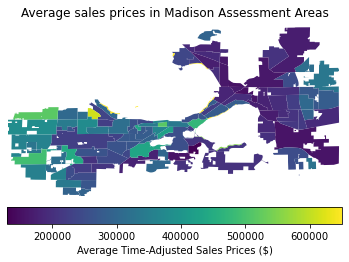

In [157]:
## Sales Price_Mean
legend_options={'label': "Average Time-Adjusted Sales Prices ($)",
             'orientation': "horizontal", 'pad': 0.05}

assmt_areas_temp = assmt_areas.copy()
assmt_areas_temp["Sales_Price_Mean"] = assmt_areas_temp["Sales_Price_Mean"].apply(lambda x: truncate_value(x, 0, 650000))

fig, ax = setup_map_axes()
ax.set_title("Average sales prices in Madison Assessment Areas")
assmt_areas_temp.plot(ax=ax, column="Sales_Price_Mean", legend=True, legend_kwds=legend_options)
fig.savefig("price_avg_assmt.svg")
fig.savefig("price_avg_assmt.png", dpi=300)

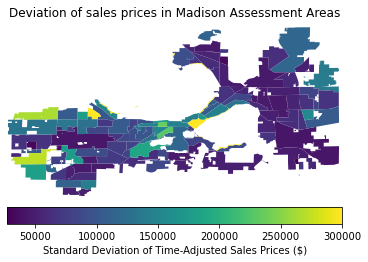

In [158]:
## Sales Price STD Dev
legend_options={'label': "Standard Deviation of Time-Adjusted Sales Prices ($)",
             'orientation': "horizontal", 'pad': 0.05}

assmt_areas_temp = assmt_areas.copy()
assmt_areas_temp["Sales_Price_Std"] = assmt_areas_temp["Sales_Price_Std"].apply(lambda x: truncate_value(x, 0, 0.3e6))

fig, ax = setup_map_axes()
ax.set_title("Deviation of sales prices in Madison Assessment Areas")
assmt_areas_temp.plot(ax=ax, column="Sales_Price_Std", legend=True, legend_kwds=legend_options)
fig.savefig("price_dev_assmt.svg")
fig.savefig("price_dev_assmt.png", dpi=300)

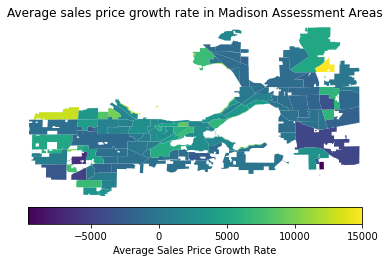

In [159]:
## Growth Rate Mean
legend_options={'label': "Average Sales Price Growth Rate",
             'orientation': "horizontal", 'pad': 0.05}

assmt_areas_temp = assmt_areas.copy()
assmt_areas_temp["Growth_Mean"] = assmt_areas_temp["Growth_Mean"].apply(lambda x: truncate_value(x, -11000, 15000))

fig, ax = setup_map_axes()
ax.set_title("Average sales price growth rate in Madison Assessment Areas")
assmt_areas_temp.plot(ax=ax, column="Growth_Mean", legend=True, legend_kwds=legend_options)
fig.savefig("growth_avg_assmt.svg")
fig.savefig("growth_avg_assmt.png", dpi=300)

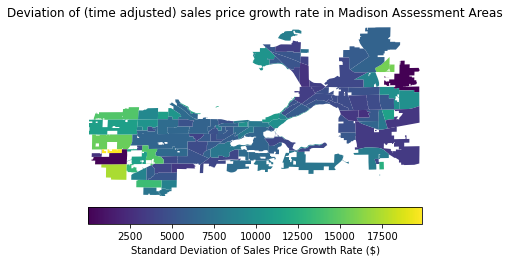

In [152]:
## Growth Rate Standard Deviation
legend_options={'label': "Standard Deviation of Sales Price Growth Rate ($)",
             'orientation': "horizontal", 'pad': 0.05}

fig, ax = setup_map_axes()
ax.set_title("Deviation of sales price growth rate in Madison Assessment Areas")
assmt_areas.plot(ax=ax, column="Growth_Std", legend=True, legend_kwds=legend_options)
fig.savefig("price_dev_assmt.svg")
fig.savefig("growth_dev_assmt.png", dpi=300)